In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
cro_df = pd.read_csv(Path('../../resources/prices/coin_CryptocomCoin.csv'), index_col='SNo')
cro_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Crypto.com Coin,CRO,2018-12-15 23:59:59,0.019845,0.016150,0.019542,0.017243,9.897096e+05,0.000000e+00
2,Crypto.com Coin,CRO,2018-12-16 23:59:59,0.017496,0.014127,0.017213,0.015301,7.171740e+05,0.000000e+00
3,Crypto.com Coin,CRO,2018-12-17 23:59:59,0.016723,0.011487,0.015186,0.014448,6.156226e+05,1.547062e+07
4,Crypto.com Coin,CRO,2018-12-18 23:59:59,0.017215,0.013553,0.014308,0.016260,7.644745e+05,1.785590e+07
5,Crypto.com Coin,CRO,2018-12-19 23:59:59,0.031509,0.015609,0.016087,0.020790,1.025196e+06,2.340088e+07
...,...,...,...,...,...,...,...,...,...
802,Crypto.com Coin,CRO,2021-02-23 23:59:59,0.220666,0.138515,0.217134,0.159152,8.188833e+08,3.842535e+09
803,Crypto.com Coin,CRO,2021-02-24 23:59:59,0.181438,0.148621,0.157710,0.160139,3.466587e+08,3.866367e+09
804,Crypto.com Coin,CRO,2021-02-25 23:59:59,0.177585,0.155505,0.160073,0.155505,4.668219e+08,3.754477e+09


In [3]:
cro_df['Date'] = pd.to_datetime(cro_df['Date']).dt.date
cro_df['Date'] = pd.to_datetime(cro_df['Date'])
cro_df['Spread'] = cro_df.High - cro_df.Low
cro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 1 to 806
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       806 non-null    object        
 1   Symbol     806 non-null    object        
 2   Date       806 non-null    datetime64[ns]
 3   High       806 non-null    float64       
 4   Low        806 non-null    float64       
 5   Open       806 non-null    float64       
 6   Close      806 non-null    float64       
 7   Volume     806 non-null    float64       
 8   Marketcap  806 non-null    float64       
 9   Spread     806 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 69.3+ KB


## Plot the closing value of Crypto.com Coin over time

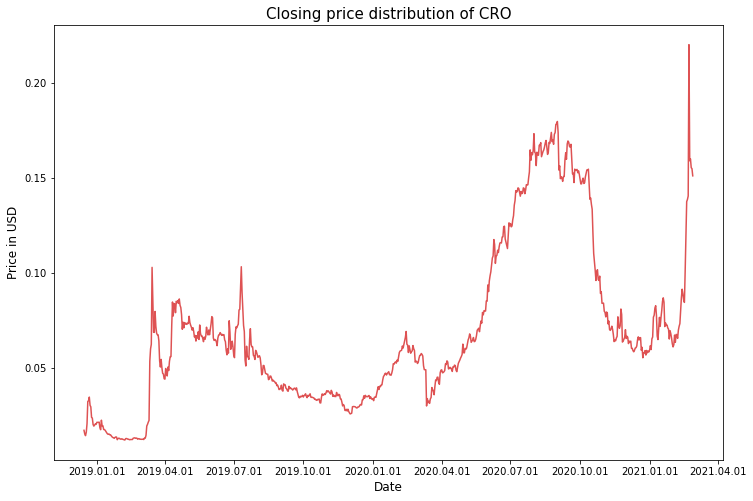

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = cro_df.Close.values, x=cro_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = cro_df.Close.values, x=cro_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of CRO", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

cro_df['Date_mpl'] = cro_df['Date'].apply(lambda x: mdates.date2num(x))

temp_cro_df = cro_df.copy(deep=False)
temp_cro_df = temp_cro_df.set_index(['Date'])
temp_cro_df = temp_cro_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_cro_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2018-12-15,0.019845,0.016150,0.019542,0.017243,9.897096e+05,17880.0
2018-12-16,0.017496,0.014127,0.017213,0.015301,7.171740e+05,17881.0
2018-12-17,0.016723,0.011487,0.015186,0.014448,6.156226e+05,17882.0
2018-12-18,0.017215,0.013553,0.014308,0.016260,7.644745e+05,17883.0
2018-12-19,0.031509,0.015609,0.016087,0.020790,1.025196e+06,17884.0
...,...,...,...,...,...,...
2021-02-23,0.220666,0.138515,0.217134,0.159152,8.188833e+08,18681.0
2021-02-24,0.181438,0.148621,0.157710,0.160139,3.466587e+08,18682.0
2021-02-25,0.177585,0.155505,0.160073,0.155505,4.668219e+08,18683.0


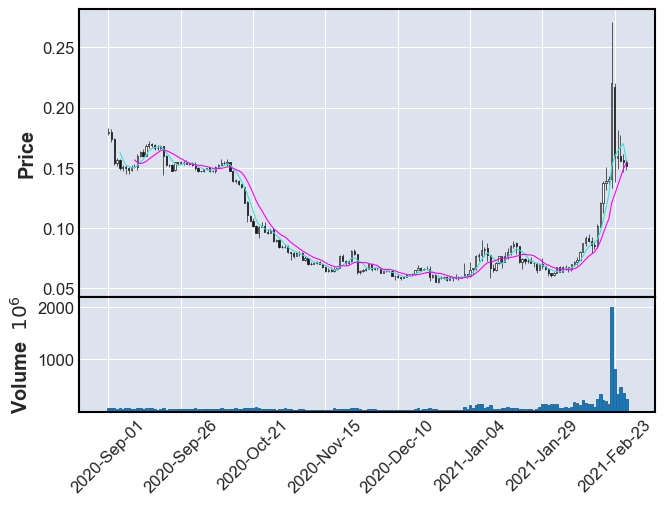

In [6]:
mpf.plot(temp_cro_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_CryptocomCoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.5)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,0.145996,0.129064,0.161087
183,2021-03-03 23:59:59,0.148347,0.131526,0.165330
184,2021-03-04 23:59:59,0.150347,0.133557,0.167569
185,2021-03-05 23:59:59,0.154118,0.136968,0.173142
186,2021-03-06 23:59:59,0.156337,0.138689,0.172606


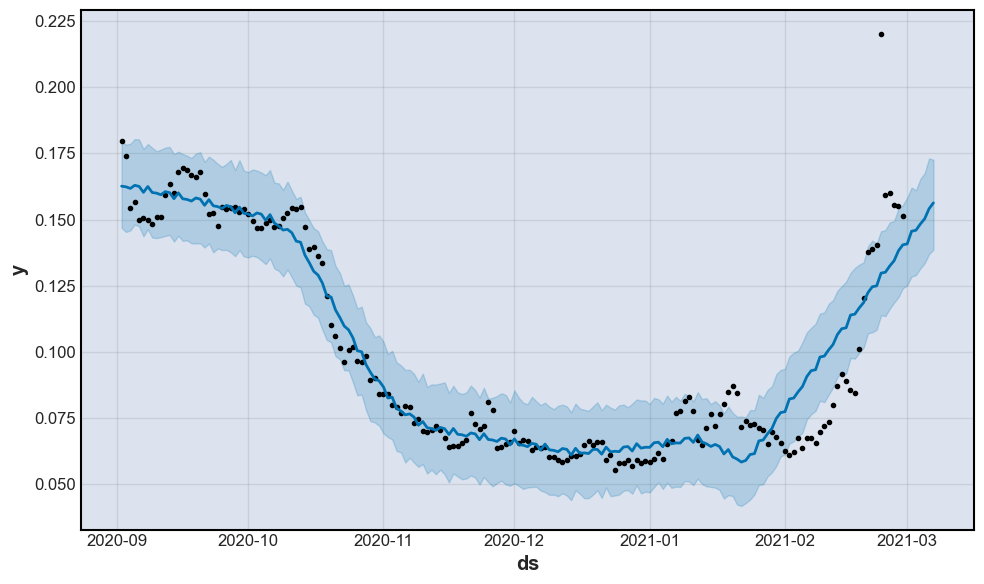

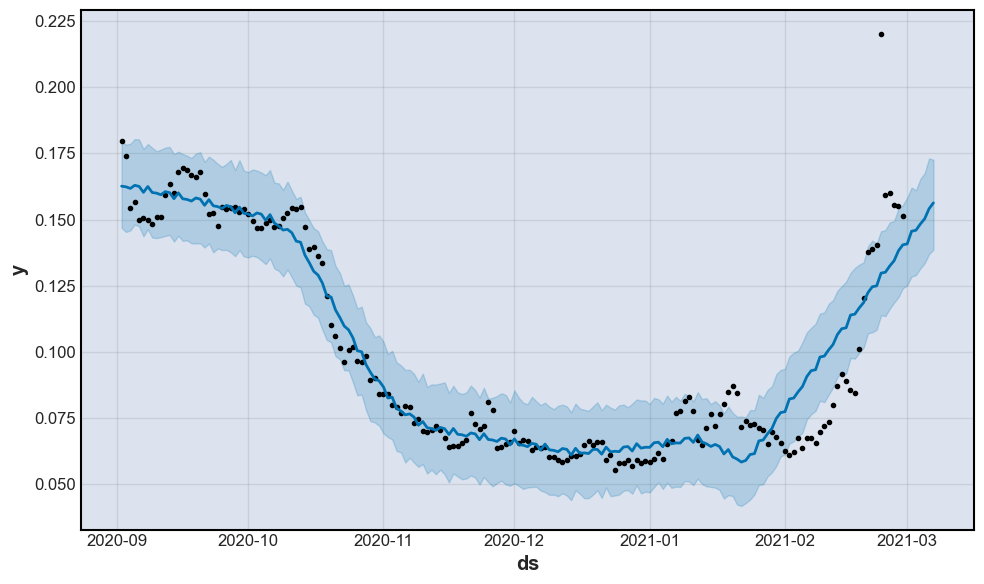

In [9]:
m.plot(forecast)

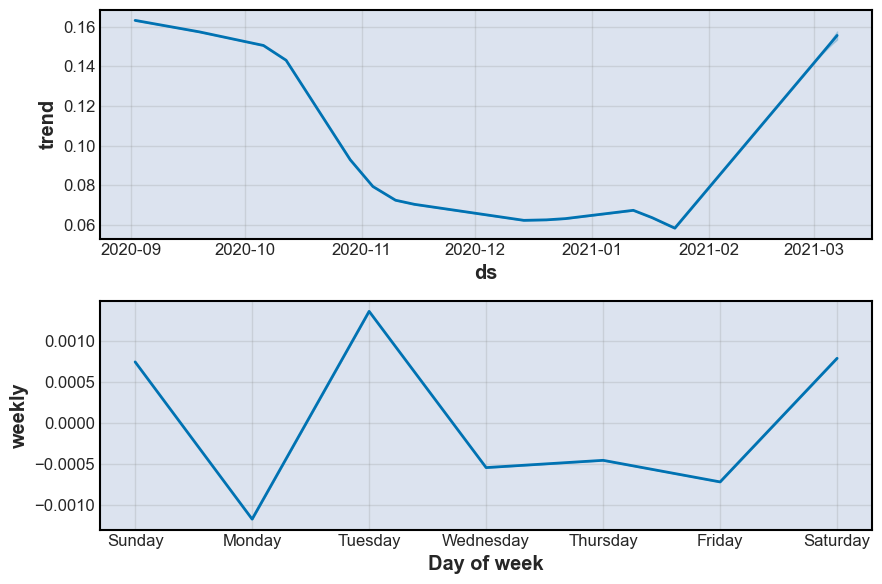

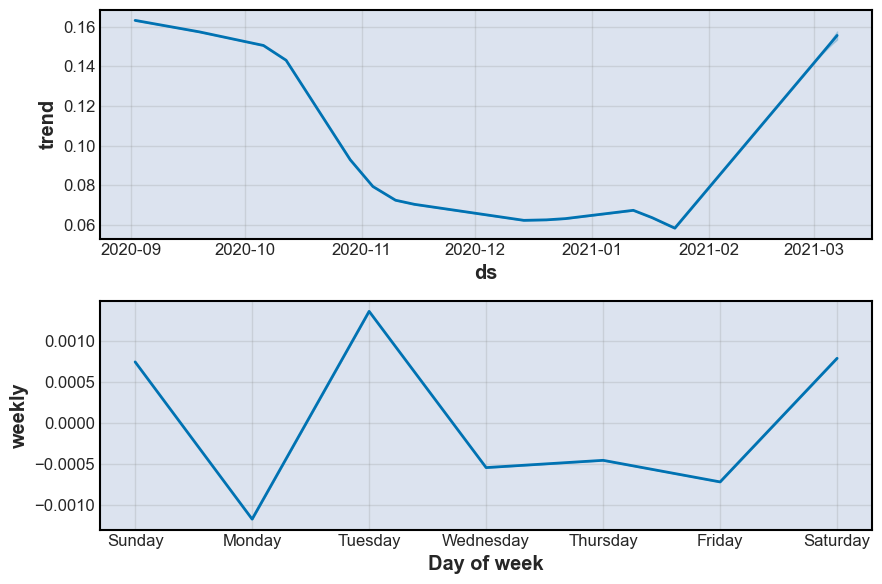

In [10]:
m.plot_components(forecast)